### Input

In [31]:
%load_ext autoreload
%matplotlib inline
%load_ext nb_black

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

In [32]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import gc

pd.set_option("display.max_columns", 500)

<IPython.core.display.Javascript object>

In [33]:
%autoreload

<IPython.core.display.Javascript object>

### Constants

In [34]:
run = 1

<IPython.core.display.Javascript object>

In [35]:
input_dir = "./input/16Jan/"
output_dir = "./output/run{}/systematics/".format(run)

<IPython.core.display.Javascript object>

In [36]:
geny_syst_knobs = [
    "AGKYpT1pi_Genie",
    "AGKYxF1pi_Genie",
    "AhtBY_Genie",
    "AxFFCCQEshape_Genie",
    "BhtBY_Genie",
    "CV1uBY_Genie",
    "CV2uBY_Genie",
    "DecayAngMEC_Genie",
    "EtaNCEL_Genie",
    "FrAbs_N_Genie",
    "FrAbs_pi_Genie",
    "FrCEx_N_Genie",
    "FrCEx_pi_Genie",
    "FrInel_N_Genie",
    "FrInel_pi_Genie",
    "FrPiProd_N_Genie",
    "FrPiProd_pi_Genie",
    "FracDelta_CCMEC_Genie",
    "FracPN_CCMEC_Genie",
    "MFP_N_Genie",
    "MFP_pi_Genie",
    "MaCCQE_Genie",
    "MaCCRES_Genie",
    "MaNCEL_Genie",
    "MaNCRES_Genie",
    "MvCCRES_Genie",
    "MvNCRES_Genie",
    "NonRESBGvbarnCC1pi_Genie",
    "NonRESBGvbarnCC2pi_Genie",
    "NonRESBGvbarnNC1pi_Genie",
    "NonRESBGvbarnNC2pi_Genie",
    "NonRESBGvbarpCC1pi_Genie",
    "NonRESBGvbarpCC2pi_Genie",
    "NonRESBGvbarpNC1pi_Genie",
    "NonRESBGvbarpNC2pi_Genie",
    "NonRESBGvnCC1pi_Genie",
    "NonRESBGvnCC2pi_Genie",
    "NonRESBGvnNC1pi_Genie",
    "NonRESBGvnNC2pi_Genie",
    "NonRESBGvpCC1pi_Genie",
    "NonRESBGvpCC2pi_Genie",
    "NonRESBGvpNC1pi_Genie",
    "NonRESBGvpNC2pi_Genie",
    "NormCCMEC_Genie",
    "NormNCMEC_Genie",
    "RDecBR1eta_Genie",
    "RDecBR1gamma_Genie",
    "RPA_CCQE_Genie",
    "Theta_Delta2Npi_Genie",
    "VecFFCCQEshape_Genie",
    "XSecShape_CCMEC_Genie",
]
# Test for duplicates
assert len(geny_syst_knobs) == len(set(geny_syst_knobs))
num_syst = len(geny_syst_knobs)

<IPython.core.display.Javascript object>

### Definitions

In [37]:
def post(x):
    return np.append(x, x[-1])

<IPython.core.display.Javascript object>

### Load Data

In [38]:
data = pickle.load(open(input_dir + "after_training_run{}.pckl".format(run), "rb"))
weights = pickle.load(open(input_dir + "run{}_weights.pckl".format(run), "rb"))

<IPython.core.display.Javascript object>

In [39]:
samples = ["nu", "nue", "on", "off", "dirt"]
title_str = "MicroBooNE Run{}: {:.1e} POT".format(run, data["on"]["pot"])

<IPython.core.display.Javascript object>

In [40]:
for s in list(data.keys()):
    if s not in samples:
        del data[s]
gc.collect()

877

<IPython.core.display.Javascript object>

In [62]:
print(len(data["nue"]))

6


<IPython.core.display.Javascript object>

In [49]:
print(weights["nue"][b"weightsGenie_vec"].counts)
print(len(weights["nue"][b"weightsGenie_vec"]))

[102 102 102 ... 102 102 102]
85087


<IPython.core.display.Javascript object>

In [59]:
weights["nue"]["genie"] = {}
for N, label in enumerate(geny_syst_knobs):
    down = weights["nue"][b"weightsGenie_vec"][:, 2 * N]
    up = weights["nue"][b"weightsGenie_vec"][:, 2 * N + 1]
    weights["nue"]["genie"][label] = [down, up]

<IPython.core.display.Javascript object>

### Plots

### Sandbox

In [21]:
weights["nue"][b"weightsGenie"].counts

array([2, 2, 2, ..., 2, 2, 2])

<IPython.core.display.Javascript object>

In [22]:
len(weights["nue"][b"weightsGenie"])

85087

<IPython.core.display.Javascript object>

In [23]:
weights["nue"][b"weightsFlux"].counts

array([50, 50, 50, ..., 50, 50, 50])

<IPython.core.display.Javascript object>

In [63]:
selector = "select & e_candidate"
field = "shr_energy_y_v"
w_flux = b"weightsFlux"
w_genie = b"weightsGenie_vec"
x_min = 100
x_max = 1000
n_bin = 9

data_cv = data["nue"]["daughters"].query(selector)["shr_energy_y_v"]
data_index = data_cv.index.get_level_values(0)
weights_cv = weights["nue"][b"weightSplineTimesTune"][data_index]
weights_spline = weights["nue"][b"weightSpline"][data_index]
weights_flux = weights["nue"][w_flux][data_index] * weights_cv
weights_genie = weights["nue"][w_genie][data_index] * weights_spline

num_universes_flux = weights_flux.counts[0]
num_universes_genie = weights_genie.counts[0]
num_events = len(weights_flux.counts)
assert num_events == len(data_index)
weights_flux = np.reshape(weights_flux.flatten(), (num_universes_flux, num_events))
weights_genie = np.reshape(weights_genie.flatten(), (num_universes_genie, num_events))

bins_cv, edges = np.histogram(
    data_cv, weights=weights_cv, range=(x_min, x_max), bins=n_bin
)
bins_flux = []
for i, weights_i in enumerate(weights_flux):
    bins_temp, _ = np.histogram(
        data_cv, weights=weights_i, range=(x_min, x_max), bins=n_bin
    )
    bins_flux.append(post(bins_temp))
bins_genie = []
for i, weights_i in enumerate(weights_genie):
    bins_temp, _ = np.histogram(
        data_cv, weights=weights_i, range=(x_min, x_max), bins=n_bin
    )
    bins_genie.append(post(bins_temp))

IndexError: index 85093 is out of bounds for axis 0 with size 85087

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Genie Uncertainty')

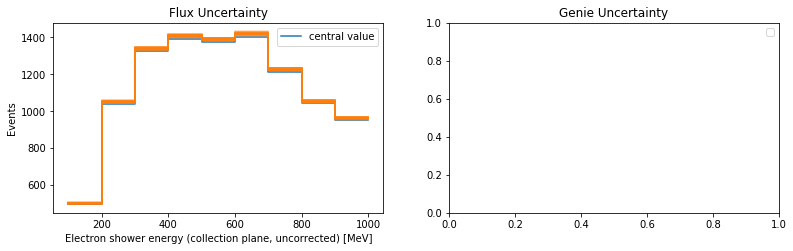

<IPython.core.display.Javascript object>

In [46]:
fig, ax = plt.subplots(ncols=2, figsize=(13, 3.5))

ax[0].step(edges, post(bins_cv), where="post", label="central value")
for b in bins_flux:
    ax[0].step(edges, b, where="post", color="C1", alpha=0.3)
ax[0].legend()
ax[0].set_title("Flux Uncertainty")
ax[0].set_xlabel("Electron shower energy (collection plane, uncorrected) [MeV]")
ax[0].set_ylabel("Events")


# ax[1].step(edges, post(bins_cv), where="post", label="central value")
for b in bins_genie:
    print(b)
    ax[1].step(edges, b, where="post", color="C1", alpha=0.3)
ax[1].legend()
ax[1].set_title("Genie Uncertainty")

In [52]:
a = np.vstack(bins_flux)

<IPython.core.display.Javascript object>

In [58]:
(np.max(a, axis=0) - np.min(a, axis=0)) / post(bins_cv) * 100

array([1.98374156, 1.53666636, 1.36049456, 1.44900447, 1.12230495,
       1.7078129 , 1.17804225, 1.48917917, 1.58618385, 1.58618385])

<IPython.core.display.Javascript object>